In [6]:
#-- Draw anomalies for 1997 and 1998
# idir = "/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/20*.nc"
%matplotlib inline
import os
import pandas as pd
import xarray as xr
from netCDF4 import  num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

import os
os.getcwd()

%cd /home/599/ars599/Documents/a10/


/home/599/ars599/Documents/a10


In [9]:
file1 = 'sst_HI-00_output.nc'
file2 = 'sst_HI-02_output.nc'
sst1   = xr.open_dataset(file1)['fld_s00i024']
sst2   = xr.open_dataset(file2)['fld_s00i024']
sst1

<xarray.DataArray 'fld_s00i024' (time: 600, lat: 145, lon: 192)>
[16704000 values with dtype=float32]
Coordinates:
  * time              (time) datetime64[ns] 1885-06-16 ... 1874-07-16T12:00:00
  * lat               (lat) float64 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * lon               (lon) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    surface_altitude  (time, lat, lon) float64 ...
    height            float64 ...
    height_0          float64 ...
    pseudo_level_1    int32 ...
Attributes:
    standard_name:    surface_temperature
    long_name:        SURFACE TEMPERATURE AFTER TIMESTEP
    units:            K
    um_stash_source:  m01s00i024
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [19]:
sst_diff = sst1.sel(time='1885-06-16') - sst2.sel(time='1885-06-16')
sst_diff

<xarray.DataArray 'fld_s00i024' (time: 1, lat: 145, lon: 192)>
array([[[-0.51919556, -0.51919556, -0.51919556, ..., -0.51919556,
         -0.51919556, -0.51919556],
        [-0.14035034, -0.12678528, -0.16003418, ..., -0.13919067,
         -0.1545105 , -0.10453796],
        [ 0.5641327 ,  0.5044861 ,  0.43452454, ...,  0.6824646 ,
          0.6324158 ,  0.5707855 ],
        ...,
        [ 0.36557007,  0.37820435,  0.41064453, ...,  0.3031006 ,
          0.32559204,  0.32113647],
        [ 0.23931885,  0.27111816,  0.25726318, ...,  0.24667358,
          0.23129272,  0.22769165],
        [ 0.3517456 ,  0.3517456 ,  0.3517456 , ...,  0.3517456 ,
          0.3517456 ,  0.3517456 ]]], dtype=float32)
Coordinates:
  * time              (time) datetime64[ns] 1885-06-16
  * lat               (lat) float64 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * lon               (lon) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    surface_altitude  (time, lat, lon) float64 2.802e+03 2.802e+03 ... 0.0 0.0
    height            float64 10.0
    height_0          float64 1.5
    pseudo_level_1    int32 1

/local/p66/ars599/tmp/ipykernel_2673968/822587393.py:8: UserWarning: linewidths is ignored by contourf
  plt.contourf(sst_diff.lon, sst_diff.lat,


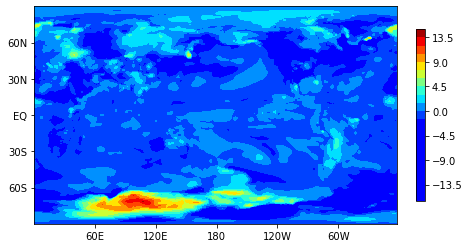

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr

levs = np.arange(16, 29, 0.05)
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
cm = clr.LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))
fig = plt.figure(figsize = (7, 4))
plt.contourf(sst_diff.lon, sst_diff.lat,
             sst_diff.squeeze(),
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(60, 350, 60), ['60E', '120E', '180', '120W', '60W'])
plt.yticks(np.arange(-60, 90, 30), ['60S', '30S', 'EQ', '30N', '60N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()

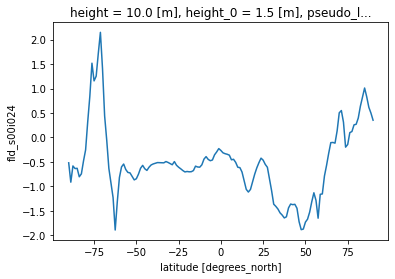

In [38]:
sst_time_and_zonal_mean = sst_diff.mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()

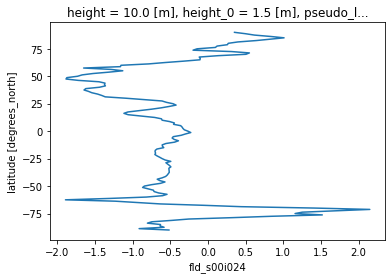

In [ ]:
# some might prefer to have lat on the y axis
sst_time_and_zonal_mean.plot(y='lat')